In [61]:
import pandas as pd #untuk memproses data, manipulasi data, dan analisis data
import numpy as np #fungsi untuk aljabar linier dan pembuatan bilangan acak
import matplotlib.pyplot as plt #untuk visualisasi data seperti plot, histogram, bar chart, dll
%matplotlib inline
import seaborn as sns #untuk menampilkan visualisasi data lebih menarik
import librosa
import librosa.display
import resampy

from scipy import signal
import tensorflow as tf
import IPython.display as ipd

import pickle
from pickle import load

import pandas as pd

import os

#--Sklearn library-- membantu melakukan processing data ataupun melakukan training data
from sklearn.model_selection import train_test_split #membagi data secara acak
from sklearn.metrics import confusion_matrix, classification_report #untuk memplot confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay #untuk memplot confusion matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score #model performance
from sklearn import metrics

import warnings

warnings.filterwarnings('ignore') # To supress warnings
 # set the background for the graphs
plt.style.use('ggplot')

In [62]:
def features_extractor(file_name):
    audio, sample_rate = librosa.load(file_name)

    emphasized_audio = librosa.effects.preemphasis(y=audio, coef=0.97)

    mfccs_features = librosa.feature.mfcc(y=emphasized_audio,
                                          n_fft=2048,
                                          hop_length=512,
                                          sr=44100,
                                          window='hamming',
                                          dct_type=2,
                                          n_mfcc=20)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

    return mfccs_scaled_features

def extract_mfcc_from_folders(folder_paths):
    all_mfccs = []
    all_labels = []

    for i, folder_path in enumerate(folder_paths):
        label = i  # Assign a unique label to each class
        for filename in os.listdir(folder_path):
            file_path = os.path.join(folder_path, filename)
            if os.path.isfile(file_path) and filename.endswith('.wav'):
                mfccs = features_extractor(file_path)
                all_mfccs.append(mfccs)
                all_labels.append(label)

    return np.array(all_mfccs), np.array(all_labels)

# Define paths to the training and testing folders for each class
training_folder_paths = [
    r'C:\Users\ushine\Data Mining\Azan Sukses\split_azan_dataset\training\ajam',
    r'C:\Users\ushine\Data Mining\Azan Sukses\split_azan_dataset\training\bayati',
    r'C:\Users\ushine\Data Mining\Azan Sukses\split_azan_dataset\training\hijaz',
    r'C:\Users\ushine\Data Mining\Azan Sukses\split_azan_dataset\training\nahawand',
    r'C:\Users\ushine\Data Mining\Azan Sukses\split_azan_dataset\training\rast'
]

testing_folder_paths = [
    r'C:\Users\ushine\Data Mining\Azan Sukses\split_azan_dataset\testing\ajam',
    r'C:\Users\ushine\Data Mining\Azan Sukses\split_azan_dataset\testing\bayati',
    r'C:\Users\ushine\Data Mining\Azan Sukses\split_azan_dataset\testing\hijaz',
    r'C:\Users\ushine\Data Mining\Azan Sukses\split_azan_dataset\testing\nahawand',
    r'C:\Users\ushine\Data Mining\Azan Sukses\split_azan_dataset\testing\rast'
]

# Extract MFCCs and labels from training data
training_mfccs, training_labels = extract_mfcc_from_folders(training_folder_paths)

# Extract MFCCs and labels from testing data
testing_mfccs, testing_labels = extract_mfcc_from_folders(testing_folder_paths)

# Display the shape of the resulting arrays
print("Training MFCCs shape:", training_mfccs.shape)
print("Training Labels shape:", training_labels.shape)
print("Testing MFCCs shape:", testing_mfccs.shape)
print("Testing Labels shape:", testing_labels.shape)

# Save extracted features and labels using pickle
training_data = {'features': training_mfccs, 'labels': training_labels}
testing_data = {'features': testing_mfccs, 'labels': testing_labels}

with open('./Training_Data.pkl', 'wb') as f:
    pickle.dump(training_data, f)

with open('./Testing_Data.pkl', 'wb') as f:
    pickle.dump(testing_data, f)

# Load extracted features and labels using pickle
with open('./Training_Data.pkl', 'rb') as f:
    training_data = pickle.load(f)

with open('./Testing_Data.pkl', 'rb') as f:
    testing_data = pickle.load(f)

# Create DataFrames for training and testing data
training_df = pd.DataFrame({'feature': training_data['features'].tolist(), 'label': training_data['labels']})
testing_df = pd.DataFrame({'feature': testing_data['features'].tolist(), 'label': testing_data['labels']})

# Rename labels
label_mapping = {0: 'ajam', 1: 'bayati', 2: 'hijaz', 3: 'nahawand', 4: 'rast'}
training_df['label'] = training_df['label'].map(label_mapping)
testing_df['label'] = testing_df['label'].map(label_mapping)

Training MFCCs shape: (1600, 20)
Training Labels shape: (1600,)
Testing MFCCs shape: (400, 20)
Testing Labels shape: (400,)


In [63]:
# Tampilkan seluruh data dari DataFrame training_df
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print("Training DataFrame:")
training_df

Training DataFrame:


,feature,label
0,"[-169.40005493164062, -87.45153045654297, -32....",ajam
1,"[-216.03111267089844, -81.64463806152344, -28....",ajam
2,"[-269.8840637207031, -107.09385681152344, -25....",ajam
3,"[-248.83279418945312, -91.78166961669922, -9.5...",ajam
4,"[-287.2140197753906, -89.90975952148438, -19.8...",ajam
5,"[-215.65478515625, -105.49163818359375, -35.61...",ajam
6,"[-259.1195373535156, -80.16199493408203, -22.2...",ajam
7,"[-266.0588073730469, -69.66576385498047, -23.6...",ajam
8,"[-267.2538757324219, -85.51531982421875, -32.5...",ajam
9,"[-306.8114013671875, -75.06046295166016, -26.2...",ajam


In [64]:
# Tampilkan seluruh data dari DataFrame testing_df
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print("\nTesting DataFrame:")
testing_df


Testing DataFrame:


,feature,label
0,"[-250.51219177246094, -88.4227066040039, -51.5...",ajam
1,"[-253.3995819091797, -72.78446197509766, -20.7...",ajam
2,"[-212.60862731933594, -91.84952545166016, -31....",ajam
3,"[-225.0244598388672, -85.6840591430664, -33.54...",ajam
4,"[-213.65835571289062, -97.1494140625, -45.9540...",ajam
5,"[-198.89625549316406, -108.28191375732422, -40...",ajam
6,"[-238.53306579589844, -88.45026397705078, -20....",ajam
7,"[-246.26458740234375, -100.0235824584961, -22....",ajam
8,"[-313.7008361816406, -49.270179748535156, -85....",ajam
9,"[-308.4237976074219, -38.88069152832031, -26.7...",ajam


In [65]:
# Extract features and labels from training DataFrame
X_train = np.array(training_df['feature'].tolist())
y_train = np.array(training_df['label'].tolist())

# Extract features and labels from testing DataFrame
X_test = np.array(testing_df['feature'].tolist())
y_test = np.array(testing_df['label'].tolist())

# Display the shape of the resulting arrays
print("Training Features shape:", X_train.shape)
print("Training Labels shape:", y_train.shape)
print("Testing Features shape:", X_test.shape)
print("Testing Labels shape:", y_test.shape)

Training Features shape: (1600, 20)
Training Labels shape: (1600,)
Testing Features shape: (400, 20)
Testing Labels shape: (400,)


In [66]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Convert labels to numerical encoding
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)

In [67]:
y_train = to_categorical(y_train_encoded)
y_test = to_categorical(y_test_encoded)

In [68]:
import numpy as np
import time
import random
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold


# Best Hyperparameters from Grid Search
best_hyperparameters = {'dropout_rate1': 0.3, 'dropout_rate2': 0.1, 'dropout_rate3': 0.1, 
                        'learning_rate': 0.001, 'units_layer1': 2048, 'units_layer2': 1024, 
                        'units_layer3': 256, 'units_layer4': 128, 'units_layer5': 64}


# Inisialisasi K-Fold Cross Validation
kf = KFold(n_splits=10, shuffle=True, random_state=random.randint(1, 1000))
fold = 1

losses = []  # Untuk menyimpan hasil loss
train_accuracies = []  # Untuk menyimpan hasil akurasi training
testing_accuracies = []  # Untuk menyimpan hasil akurasi testing
histories = [] # Untuk menyimpan hasil model
training_times = [] # Untuk menyimpan waktu pelatihan setiap fold
all_predictions = []
precicion_scores = []
recall_scores = []
f1_scores = []  # Untuk menyimpan F1 score dari setiap fold
classification_reports = [] #Untuk menyimpan laporan klasifikasi

# Loop melalui setiap lipatan
for train_index, test_index in kf.split(X_train, y_train):
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
    
    # Persentase pembagian data training dan testing
    percentage_train = len(train_index) / len(X_train) * 100
    percentage_test = len(test_index) / len(X_train) * 100

    # Inisialisasi model neural network dengan menggunakan parameter terbaik
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(units=best_hyperparameters['units_layer1'], input_shape=(20,), activation="relu"))
    model.add(tf.keras.layers.Dropout(best_hyperparameters['dropout_rate1']))
    model.add(tf.keras.layers.Dense(units=best_hyperparameters['units_layer2'], activation="relu"))
    model.add(tf.keras.layers.Dropout(best_hyperparameters['dropout_rate2']))
    model.add(tf.keras.layers.Dense(units=best_hyperparameters['units_layer3'], activation="relu"))
    model.add(tf.keras.layers.Dropout(best_hyperparameters['dropout_rate3']))
    model.add(tf.keras.layers.Dense(units=best_hyperparameters['units_layer4'], activation="relu"))
    model.add(tf.keras.layers.Dense(units=best_hyperparameters['units_layer5'], activation="relu"))
    model.add(tf.keras.layers.Dense(units=5, activation="softmax"))

    # Kompilasi model
    optimizer = tf.keras.optimizers.Adam(best_hyperparameters['learning_rate'])
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    # Catat waktu awal
    start_time = time.time()
    
    # Tampilkan Keterangan Fold
    print(f"Fold {fold}")
    
    # Print persentase pembagian data training dan testing
    print(f"Percentage of Data for Training: {percentage_train:.2f}%")
    print(f"Percentage of Data for Testing: {percentage_test:.2f}%")

    # Latih model
    history = model.fit(X_train_fold, y_train_fold, epochs=100, batch_size=64)
    histories.append(history)
    model.summary()

    # Catat waktu selesai
    end_time = time.time()

    # Hitung waktu eksekusi
    elapsed_time = end_time - start_time
    training_times.append(elapsed_time)

    # Evaluasi model
    loss, accuracy = model.evaluate(X_train_fold, y_train_fold)
    losses.append(loss)
    train_accuracies.append(accuracy)

    # Prediksi model
    pred = model.predict(X_test_fold)
    pred_ = np.argmax(pred, axis=1)
    pred_ = label_encoder.inverse_transform(pred_)
    true_y = label_encoder.inverse_transform(np.argmax(to_categorical(y_test_fold), axis=1)[:, 1])

    # Menyimpan hasil prediksi dari fold tertentu
    fold_predictions = {'true_labels': true_y, 'predicted_labels': pred_}
    all_predictions.append(fold_predictions)
    
    # Hitung testing akurasi pada fold tertentu
    accuracy_test = accuracy_score(true_y, pred_)
    testing_accuracies.append(accuracy_test)

    # Menghitung Precision, Recall, F1 Score
    precision = precision_score(true_y, pred_, average=None)
    precicion_scores.append(precision)

    recall = recall_score(true_y, pred_, average=None)
    recall_scores.append(recall)

    f1 = f1_score(true_y, pred_, average=None)
    f1_scores.append(f1)

    # Hitung laporan klasifikasi
    report = classification_report(true_y, pred_)
    classification_reports.append(report)

    
    fold += 1


Fold 1
Percentage of Data for Training: 90.00%
Percentage of Data for Testing: 10.00%
Epoch 1/100
23/23 [==============================] - 10s 133ms/step - loss: 6.8102 - accuracy: 0.1833
Epoch 2/100
23/23 [==============================] - 3s 130ms/step - loss: 2.2797 - accuracy: 0.2410
Epoch 3/100
23/23 [==============================] - 3s 130ms/step - loss: 1.6017 - accuracy: 0.3326
Epoch 4/100
23/23 [==============================] - 3s 130ms/step - loss: 1.4645 - accuracy: 0.3556
Epoch 5/100
23/23 [==============================] - 3s 152ms/step - loss: 1.3513 - accuracy: 0.4062
Epoch 6/100
23/23 [==============================] - 3s 147ms/step - loss: 1.3335 - accuracy: 0.4194
Epoch 7/100
23/23 [==============================] - 3s 140ms/step - loss: 1.2563 - accuracy: 0.4521
Epoch 8/100
23/23 [==============================] - 3s 147ms/step - loss: 1.2330 - accuracy: 0.4465
Epoch 9/100
23/23 [==============================] - 3s 140ms/step - loss: 1.1907 - accuracy: 0.4910
Epoc

23/23 [==============================] - 3s 120ms/step - loss: 0.1098 - accuracy: 0.9604
Epoch 81/100
23/23 [==============================] - 3s 121ms/step - loss: 0.1217 - accuracy: 0.9583
Epoch 82/100
23/23 [==============================] - 3s 120ms/step - loss: 0.1011 - accuracy: 0.9625
Epoch 83/100
23/23 [==============================] - 3s 126ms/step - loss: 0.1366 - accuracy: 0.9556
Epoch 84/100
23/23 [==============================] - 3s 122ms/step - loss: 0.1008 - accuracy: 0.9653
Epoch 85/100
23/23 [==============================] - 3s 122ms/step - loss: 0.1905 - accuracy: 0.9382
Epoch 86/100
23/23 [==============================] - 3s 126ms/step - loss: 0.1524 - accuracy: 0.9451
Epoch 87/100
23/23 [==============================] - 3s 135ms/step - loss: 0.1122 - accuracy: 0.9569
Epoch 88/100
23/23 [==============================] - 4s 172ms/step - loss: 0.1237 - accuracy: 0.9618
Epoch 89/100
23/23 [==============================] - 4s 173ms/step - loss: 0.1841 - accuracy: 

23/23 [==============================] - 3s 124ms/step - loss: 0.4186 - accuracy: 0.8333
Epoch 43/100
23/23 [==============================] - 3s 130ms/step - loss: 0.4035 - accuracy: 0.8444
Epoch 44/100
23/23 [==============================] - 3s 129ms/step - loss: 0.3981 - accuracy: 0.8486
Epoch 45/100
23/23 [==============================] - 3s 131ms/step - loss: 0.3673 - accuracy: 0.8486
Epoch 46/100
23/23 [==============================] - 3s 124ms/step - loss: 0.3388 - accuracy: 0.8715
Epoch 47/100
23/23 [==============================] - 3s 121ms/step - loss: 0.3324 - accuracy: 0.8653
Epoch 48/100
23/23 [==============================] - 3s 117ms/step - loss: 0.3573 - accuracy: 0.8660
Epoch 49/100
23/23 [==============================] - 2s 93ms/step - loss: 0.3300 - accuracy: 0.8743
Epoch 50/100
23/23 [==============================] - 2s 74ms/step - loss: 0.2779 - accuracy: 0.8944
Epoch 51/100
23/23 [==============================] - 2s 73ms/step - loss: 0.2746 - accuracy: 0.8

23/23 [==============================] - 5s 198ms/step - loss: 1.3756 - accuracy: 0.3882
Epoch 5/100
23/23 [==============================] - 4s 183ms/step - loss: 1.3378 - accuracy: 0.4160
Epoch 6/100
23/23 [==============================] - 3s 121ms/step - loss: 1.2938 - accuracy: 0.4333
Epoch 7/100
23/23 [==============================] - 3s 116ms/step - loss: 1.2605 - accuracy: 0.4382
Epoch 8/100
23/23 [==============================] - 3s 124ms/step - loss: 1.2520 - accuracy: 0.4507
Epoch 9/100
23/23 [==============================] - 3s 117ms/step - loss: 1.2504 - accuracy: 0.4479
Epoch 10/100
23/23 [==============================] - 4s 172ms/step - loss: 1.1860 - accuracy: 0.4833
Epoch 11/100
23/23 [==============================] - 4s 193ms/step - loss: 1.1727 - accuracy: 0.4833
Epoch 12/100
23/23 [==============================] - 6s 243ms/step - loss: 1.1279 - accuracy: 0.5076
Epoch 13/100
23/23 [==============================] - 6s 250ms/step - loss: 1.1053 - accuracy: 0.530

23/23 [==============================] - 3s 121ms/step - loss: 0.1270 - accuracy: 0.9563
Epoch 85/100
23/23 [==============================] - 2s 77ms/step - loss: 0.1178 - accuracy: 0.9542
Epoch 86/100
23/23 [==============================] - 2s 104ms/step - loss: 0.1582 - accuracy: 0.9486
Epoch 87/100
23/23 [==============================] - 3s 123ms/step - loss: 0.1314 - accuracy: 0.9556
Epoch 88/100
23/23 [==============================] - 3s 119ms/step - loss: 0.1216 - accuracy: 0.9542
Epoch 89/100
23/23 [==============================] - 3s 143ms/step - loss: 0.1392 - accuracy: 0.9514
Epoch 90/100
23/23 [==============================] - 4s 164ms/step - loss: 0.1403 - accuracy: 0.9563
Epoch 91/100
23/23 [==============================] - 4s 171ms/step - loss: 0.1116 - accuracy: 0.9597
Epoch 92/100
23/23 [==============================] - 4s 169ms/step - loss: 0.0783 - accuracy: 0.9722
Epoch 93/100
23/23 [==============================] - 4s 155ms/step - loss: 0.0704 - accuracy: 0

23/23 [==============================] - 3s 126ms/step - loss: 0.5246 - accuracy: 0.7958
Epoch 47/100
23/23 [==============================] - 3s 129ms/step - loss: 0.4397 - accuracy: 0.8299
Epoch 48/100
23/23 [==============================] - 3s 119ms/step - loss: 0.4019 - accuracy: 0.8507
Epoch 49/100
23/23 [==============================] - 3s 119ms/step - loss: 0.3820 - accuracy: 0.8618
Epoch 50/100
23/23 [==============================] - 3s 116ms/step - loss: 0.3877 - accuracy: 0.8562
Epoch 51/100
23/23 [==============================] - 2s 87ms/step - loss: 0.3889 - accuracy: 0.8535
Epoch 52/100
23/23 [==============================] - 2s 73ms/step - loss: 0.3476 - accuracy: 0.8729
Epoch 53/100
23/23 [==============================] - 2s 75ms/step - loss: 0.3193 - accuracy: 0.8792
Epoch 54/100
23/23 [==============================] - 2s 74ms/step - loss: 0.3488 - accuracy: 0.8681
Epoch 55/100
23/23 [==============================] - 2s 75ms/step - loss: 0.3808 - accuracy: 0.852

23/23 [==============================] - 2s 74ms/step - loss: 1.2368 - accuracy: 0.4597
Epoch 9/100
23/23 [==============================] - 2s 73ms/step - loss: 1.1627 - accuracy: 0.4917
Epoch 10/100
23/23 [==============================] - 2s 73ms/step - loss: 1.1631 - accuracy: 0.5042
Epoch 11/100
23/23 [==============================] - 2s 74ms/step - loss: 1.1760 - accuracy: 0.4771
Epoch 12/100
23/23 [==============================] - 2s 74ms/step - loss: 1.1273 - accuracy: 0.5174
Epoch 13/100
23/23 [==============================] - 2s 74ms/step - loss: 1.1053 - accuracy: 0.5194
Epoch 14/100
23/23 [==============================] - 2s 75ms/step - loss: 1.1154 - accuracy: 0.5278
Epoch 15/100
23/23 [==============================] - 2s 73ms/step - loss: 1.0831 - accuracy: 0.5514
Epoch 16/100
23/23 [==============================] - 2s 73ms/step - loss: 1.0464 - accuracy: 0.5576
Epoch 17/100
23/23 [==============================] - 2s 71ms/step - loss: 1.0249 - accuracy: 0.5674
Epoc

23/23 [==============================] - 2s 75ms/step - loss: 0.1234 - accuracy: 0.9563
Epoch 90/100
23/23 [==============================] - 2s 77ms/step - loss: 0.0911 - accuracy: 0.9722
Epoch 91/100
23/23 [==============================] - 2s 77ms/step - loss: 0.1040 - accuracy: 0.9632
Epoch 92/100
23/23 [==============================] - 2s 78ms/step - loss: 0.1003 - accuracy: 0.9653
Epoch 93/100
23/23 [==============================] - 2s 78ms/step - loss: 0.0812 - accuracy: 0.9743
Epoch 94/100
23/23 [==============================] - 2s 76ms/step - loss: 0.1160 - accuracy: 0.9549
Epoch 95/100
23/23 [==============================] - 2s 77ms/step - loss: 0.1126 - accuracy: 0.9597
Epoch 96/100
23/23 [==============================] - 2s 81ms/step - loss: 0.1408 - accuracy: 0.9542
Epoch 97/100
23/23 [==============================] - 2s 78ms/step - loss: 0.1732 - accuracy: 0.9507
Epoch 98/100
23/23 [==============================] - 2s 77ms/step - loss: 0.1709 - accuracy: 0.9472
Epo

23/23 [==============================] - 2s 77ms/step - loss: 0.3459 - accuracy: 0.8694
Epoch 52/100
23/23 [==============================] - 2s 78ms/step - loss: 0.3490 - accuracy: 0.8750
Epoch 53/100
23/23 [==============================] - 2s 79ms/step - loss: 0.3450 - accuracy: 0.8715
Epoch 54/100
23/23 [==============================] - 2s 76ms/step - loss: 0.2987 - accuracy: 0.8951
Epoch 55/100
23/23 [==============================] - 2s 77ms/step - loss: 0.2735 - accuracy: 0.8938
Epoch 56/100
23/23 [==============================] - 2s 77ms/step - loss: 0.2616 - accuracy: 0.9083
Epoch 57/100
23/23 [==============================] - 2s 77ms/step - loss: 0.2102 - accuracy: 0.9181
Epoch 58/100
23/23 [==============================] - 2s 77ms/step - loss: 0.2929 - accuracy: 0.8917
Epoch 59/100
23/23 [==============================] - 2s 78ms/step - loss: 0.2412 - accuracy: 0.9146
Epoch 60/100
23/23 [==============================] - 2s 76ms/step - loss: 0.2226 - accuracy: 0.9250
Epo

23/23 [==============================] - 2s 82ms/step - loss: 1.1203 - accuracy: 0.5007
Epoch 14/100
23/23 [==============================] - 2s 82ms/step - loss: 1.0797 - accuracy: 0.5437
Epoch 15/100
23/23 [==============================] - 2s 84ms/step - loss: 1.0535 - accuracy: 0.5514
Epoch 16/100
23/23 [==============================] - 2s 84ms/step - loss: 1.0460 - accuracy: 0.5625
Epoch 17/100
23/23 [==============================] - 2s 83ms/step - loss: 1.0214 - accuracy: 0.5632
Epoch 18/100
23/23 [==============================] - 2s 82ms/step - loss: 0.9692 - accuracy: 0.5993
Epoch 19/100
23/23 [==============================] - 2s 87ms/step - loss: 0.9570 - accuracy: 0.5979
Epoch 20/100
23/23 [==============================] - 2s 89ms/step - loss: 0.9460 - accuracy: 0.6049
Epoch 21/100
23/23 [==============================] - 2s 91ms/step - loss: 0.9261 - accuracy: 0.6062
Epoch 22/100
23/23 [==============================] - 2s 87ms/step - loss: 0.8812 - accuracy: 0.6326
Epo

23/23 [==============================] - 2s 72ms/step - loss: 0.1027 - accuracy: 0.9611
Epoch 95/100
23/23 [==============================] - 2s 90ms/step - loss: 0.1233 - accuracy: 0.9590
Epoch 96/100
23/23 [==============================] - 2s 90ms/step - loss: 0.1487 - accuracy: 0.9542
Epoch 97/100
23/23 [==============================] - 2s 77ms/step - loss: 0.1221 - accuracy: 0.9542
Epoch 98/100
23/23 [==============================] - 2s 84ms/step - loss: 0.1265 - accuracy: 0.9611
Epoch 99/100
23/23 [==============================] - 2s 88ms/step - loss: 0.1296 - accuracy: 0.9583
Epoch 100/100
23/23 [==============================] - 2s 73ms/step - loss: 0.1046 - accuracy: 0.9653
Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_216 (Dense)           (None, 2048)              43008     
                                                                 
 dropout_108 (Drop

23/23 [==============================] - 2s 90ms/step - loss: 0.3048 - accuracy: 0.8889
Epoch 57/100
23/23 [==============================] - 2s 83ms/step - loss: 0.3060 - accuracy: 0.8875
Epoch 58/100
23/23 [==============================] - 2s 88ms/step - loss: 0.3053 - accuracy: 0.8854
Epoch 59/100
23/23 [==============================] - 2s 75ms/step - loss: 0.2568 - accuracy: 0.9083
Epoch 60/100
23/23 [==============================] - 2s 73ms/step - loss: 0.2526 - accuracy: 0.9007
Epoch 61/100
23/23 [==============================] - 2s 74ms/step - loss: 0.2551 - accuracy: 0.9097
Epoch 62/100
23/23 [==============================] - 2s 75ms/step - loss: 0.2711 - accuracy: 0.8972
Epoch 63/100
23/23 [==============================] - 2s 75ms/step - loss: 0.2389 - accuracy: 0.9083
Epoch 64/100
23/23 [==============================] - 2s 75ms/step - loss: 0.2024 - accuracy: 0.9278
Epoch 65/100
23/23 [==============================] - 2s 74ms/step - loss: 0.1812 - accuracy: 0.9333
Epo

23/23 [==============================] - 2s 79ms/step - loss: 1.0047 - accuracy: 0.5639
Epoch 19/100
23/23 [==============================] - 2s 75ms/step - loss: 1.0075 - accuracy: 0.5750
Epoch 20/100
23/23 [==============================] - 2s 74ms/step - loss: 0.9788 - accuracy: 0.5882
Epoch 21/100
23/23 [==============================] - 2s 72ms/step - loss: 0.9431 - accuracy: 0.5993
Epoch 22/100
23/23 [==============================] - 2s 72ms/step - loss: 0.9395 - accuracy: 0.5965
Epoch 23/100
23/23 [==============================] - 2s 76ms/step - loss: 0.9335 - accuracy: 0.6028
Epoch 24/100
23/23 [==============================] - 2s 74ms/step - loss: 0.8986 - accuracy: 0.6215
Epoch 25/100
23/23 [==============================] - 2s 72ms/step - loss: 0.8636 - accuracy: 0.6278
Epoch 26/100
23/23 [==============================] - 2s 72ms/step - loss: 0.8373 - accuracy: 0.6507
Epoch 27/100
23/23 [==============================] - 2s 79ms/step - loss: 0.8083 - accuracy: 0.6597
Epo

23/23 [==============================] - 2s 73ms/step - loss: 0.0962 - accuracy: 0.9660
Epoch 100/100
23/23 [==============================] - 2s 87ms/step - loss: 0.0943 - accuracy: 0.9625
Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_228 (Dense)           (None, 2048)              43008     
                                                                 
 dropout_114 (Dropout)       (None, 2048)              0         
                                                                 
 dense_229 (Dense)           (None, 1024)              2098176   
                                                                 
 dropout_115 (Dropout)       (None, 1024)              0         
                                                                 
 dense_230 (Dense)           (None, 256)               262400    
                                                             

23/23 [==============================] - 2s 83ms/step - loss: 0.2614 - accuracy: 0.9125
Epoch 62/100
23/23 [==============================] - 2s 84ms/step - loss: 0.2282 - accuracy: 0.9153
Epoch 63/100
23/23 [==============================] - 2s 84ms/step - loss: 0.2107 - accuracy: 0.9243
Epoch 64/100
23/23 [==============================] - 2s 83ms/step - loss: 0.2418 - accuracy: 0.9132
Epoch 65/100
23/23 [==============================] - 2s 86ms/step - loss: 0.2838 - accuracy: 0.8938
Epoch 66/100
23/23 [==============================] - 2s 82ms/step - loss: 0.2031 - accuracy: 0.9278
Epoch 67/100
23/23 [==============================] - 2s 90ms/step - loss: 0.2296 - accuracy: 0.9181
Epoch 68/100
23/23 [==============================] - 2s 86ms/step - loss: 0.2407 - accuracy: 0.9097
Epoch 69/100
23/23 [==============================] - 2s 85ms/step - loss: 0.1727 - accuracy: 0.9333
Epoch 70/100
23/23 [==============================] - 2s 86ms/step - loss: 0.1852 - accuracy: 0.9250
Epo

In [69]:
# Access and print the random state
print("Random State:", kf.random_state)

Random State: 361


In [70]:
# Menampilkan hasil prediksi, metrik evaluasi, dan laporan klasifikasi untuk setiap fold
for i in range(1, fold-1):
    print(f"\nResults for Fold {i}:")
    print(f"Training Accuracy: {train_accuracies[i-1]}")
    print(f"Testing Accuracy: {testing_accuracies[i-1]}")
    print(f"Loss: {losses[i-1]}")
    print(f"Training Time: {training_times[i-1]} seconds")
    print("Precision Scores:", precicion_scores[i-1])
    print("Recall Scores:", recall_scores[i-1])
    print("F1 Scores:", f1_scores[i-1])
    print("Classification Report:\n", classification_reports[i-1])

    # Optional: Menampilkan prediksi untuk setiap fold
    fold_predictions = all_predictions[i-1]
    true_labels = fold_predictions['true_labels']
    predicted_labels = fold_predictions['predicted_labels']
    for true, pred in zip(true_labels, predicted_labels):
        print(f"True Label: {true}, Predicted Label: {pred}")



Results for Fold 1:
Training Accuracy: 0.9888888597488403
Testing Accuracy: 0.8
Loss: 0.036922868341207504
Training Time: 305.4652693271637 seconds
Precision Scores: [0.69047619 0.73333333 0.79166667 0.84848485 0.96774194]
Recall Scores: [0.80555556 0.75862069 0.76       0.75675676 0.90909091]
F1 Scores: [0.74358974 0.74576271 0.7755102  0.8        0.9375    ]
Classification Report:
               precision    recall  f1-score   support

        ajam       0.69      0.81      0.74        36
      bayati       0.73      0.76      0.75        29
       hijaz       0.79      0.76      0.78        25
    nahawand       0.85      0.76      0.80        37
        rast       0.97      0.91      0.94        33

    accuracy                           0.80       160
   macro avg       0.81      0.80      0.80       160
weighted avg       0.81      0.80      0.80       160

True Label: ajam, Predicted Label: ajam
True Label: ajam, Predicted Label: ajam
True Label: ajam, Predicted Label: ajam
Tru


Results for Fold 1:


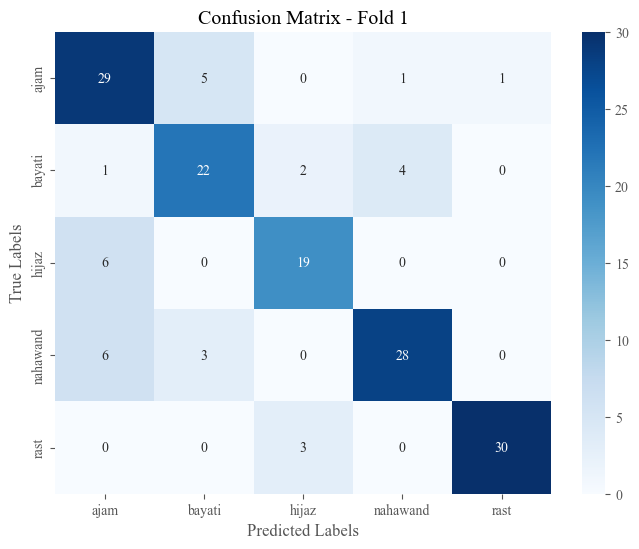

Classification Report:
               precision    recall  f1-score   support

        ajam       0.69      0.81      0.74        36
      bayati       0.73      0.76      0.75        29
       hijaz       0.79      0.76      0.78        25
    nahawand       0.85      0.76      0.80        37
        rast       0.97      0.91      0.94        33

    accuracy                           0.80       160
   macro avg       0.81      0.80      0.80       160
weighted avg       0.81      0.80      0.80       160


Results for Fold 2:


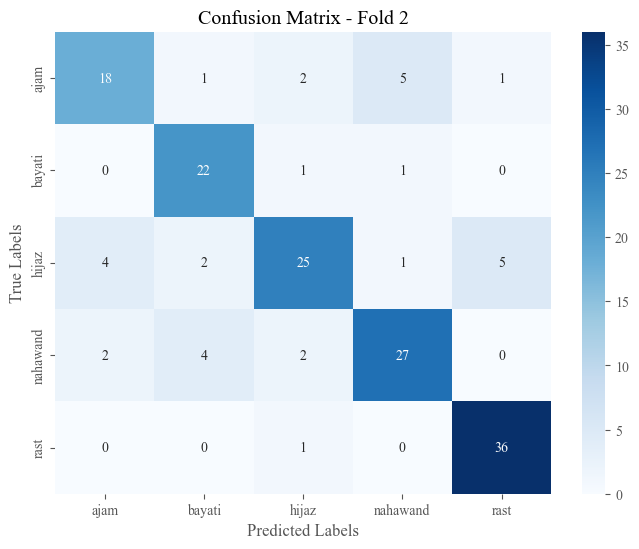

Classification Report:
               precision    recall  f1-score   support

        ajam       0.75      0.67      0.71        27
      bayati       0.76      0.92      0.83        24
       hijaz       0.81      0.68      0.74        37
    nahawand       0.79      0.77      0.78        35
        rast       0.86      0.97      0.91        37

    accuracy                           0.80       160
   macro avg       0.79      0.80      0.79       160
weighted avg       0.80      0.80      0.80       160


Results for Fold 3:


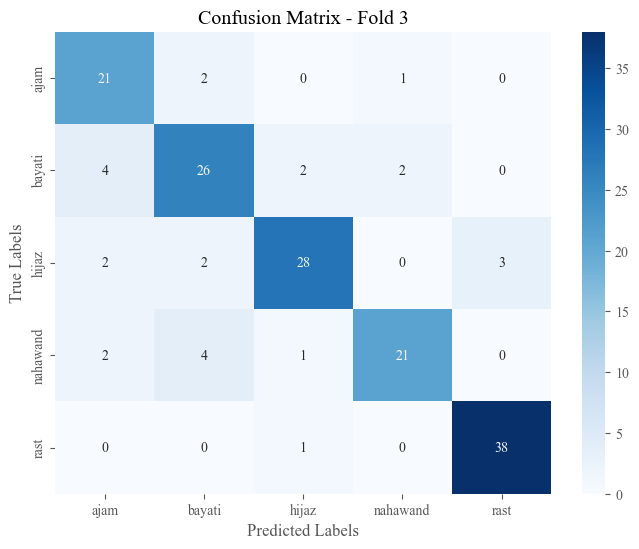

Classification Report:
               precision    recall  f1-score   support

        ajam       0.72      0.88      0.79        24
      bayati       0.76      0.76      0.76        34
       hijaz       0.88      0.80      0.84        35
    nahawand       0.88      0.75      0.81        28
        rast       0.93      0.97      0.95        39

    accuracy                           0.84       160
   macro avg       0.83      0.83      0.83       160
weighted avg       0.84      0.84      0.84       160


Results for Fold 4:


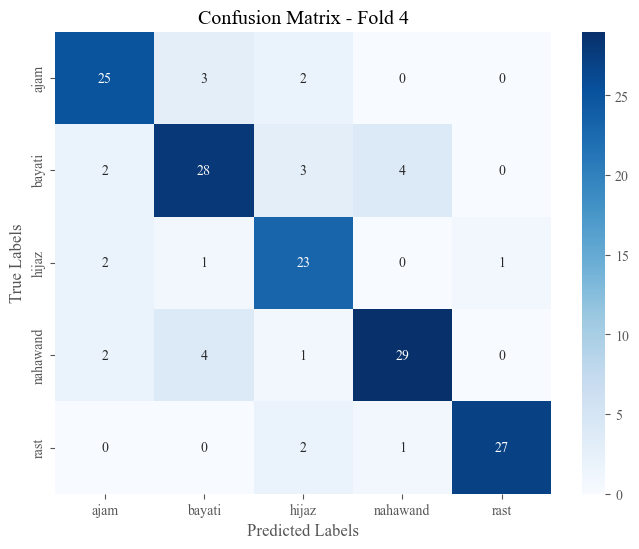

Classification Report:
               precision    recall  f1-score   support

        ajam       0.81      0.83      0.82        30
      bayati       0.78      0.76      0.77        37
       hijaz       0.74      0.85      0.79        27
    nahawand       0.85      0.81      0.83        36
        rast       0.96      0.90      0.93        30

    accuracy                           0.82       160
   macro avg       0.83      0.83      0.83       160
weighted avg       0.83      0.82      0.83       160


Results for Fold 5:


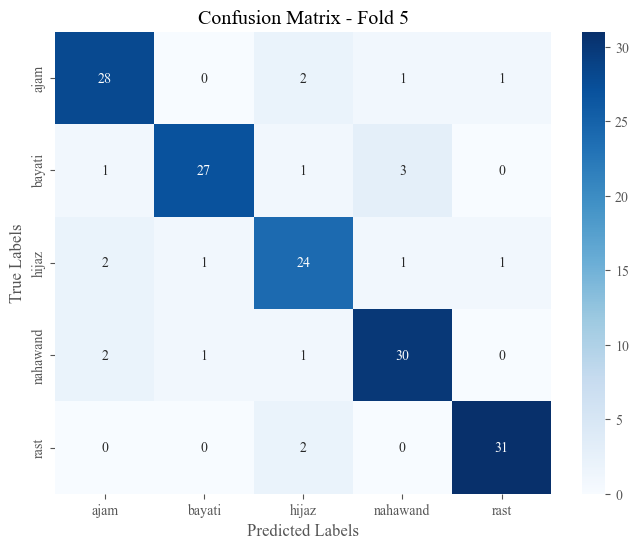

Classification Report:
               precision    recall  f1-score   support

        ajam       0.85      0.88      0.86        32
      bayati       0.93      0.84      0.89        32
       hijaz       0.80      0.83      0.81        29
    nahawand       0.86      0.88      0.87        34
        rast       0.94      0.94      0.94        33

    accuracy                           0.88       160
   macro avg       0.88      0.87      0.87       160
weighted avg       0.88      0.88      0.88       160


Results for Fold 6:


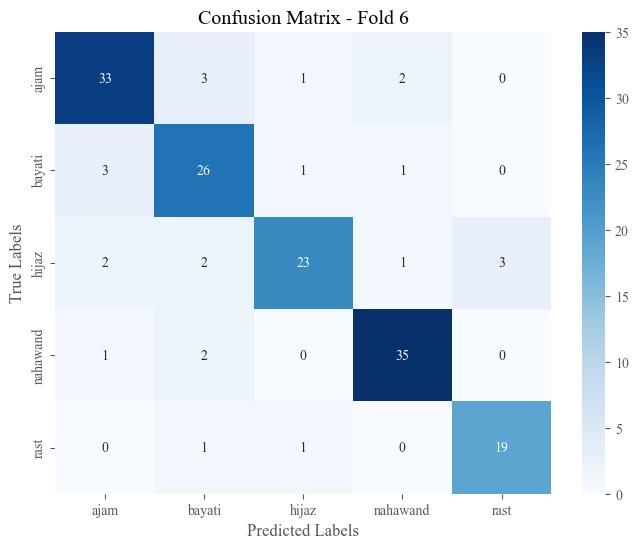

Classification Report:
               precision    recall  f1-score   support

        ajam       0.85      0.85      0.85        39
      bayati       0.76      0.84      0.80        31
       hijaz       0.88      0.74      0.81        31
    nahawand       0.90      0.92      0.91        38
        rast       0.86      0.90      0.88        21

    accuracy                           0.85       160
   macro avg       0.85      0.85      0.85       160
weighted avg       0.85      0.85      0.85       160


Results for Fold 7:


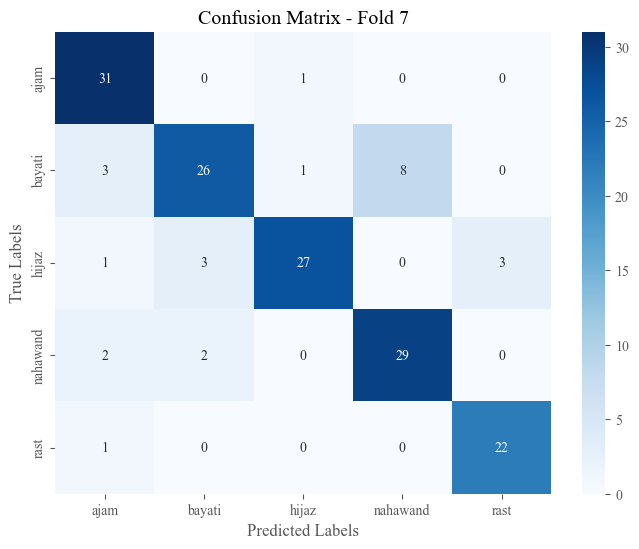

Classification Report:
               precision    recall  f1-score   support

        ajam       0.82      0.97      0.89        32
      bayati       0.84      0.68      0.75        38
       hijaz       0.93      0.79      0.86        34
    nahawand       0.78      0.88      0.83        33
        rast       0.88      0.96      0.92        23

    accuracy                           0.84       160
   macro avg       0.85      0.86      0.85       160
weighted avg       0.85      0.84      0.84       160


Results for Fold 8:


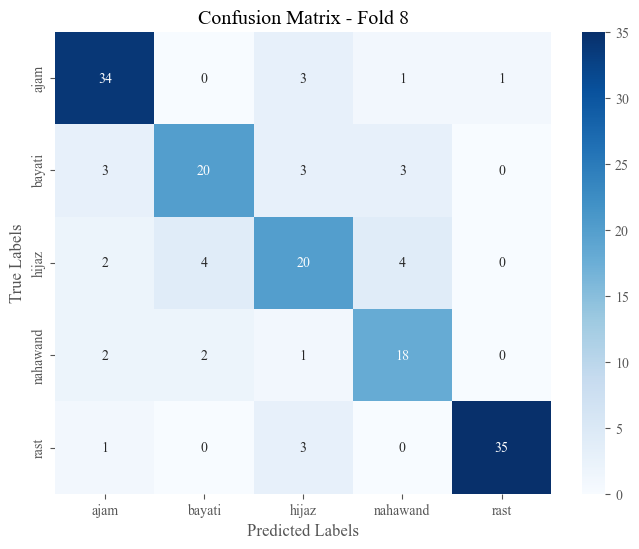

Classification Report:
               precision    recall  f1-score   support

        ajam       0.81      0.87      0.84        39
      bayati       0.77      0.69      0.73        29
       hijaz       0.67      0.67      0.67        30
    nahawand       0.69      0.78      0.73        23
        rast       0.97      0.90      0.93        39

    accuracy                           0.79       160
   macro avg       0.78      0.78      0.78       160
weighted avg       0.80      0.79      0.79       160


Results for Fold 9:


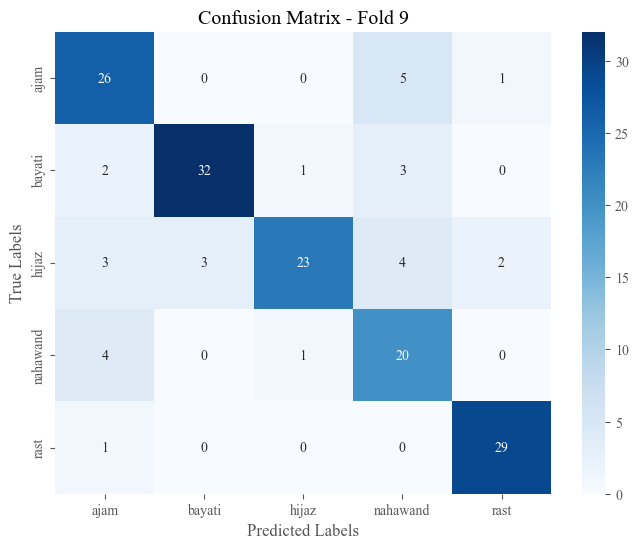

Classification Report:
               precision    recall  f1-score   support

        ajam       0.72      0.81      0.76        32
      bayati       0.91      0.84      0.88        38
       hijaz       0.92      0.66      0.77        35
    nahawand       0.62      0.80      0.70        25
        rast       0.91      0.97      0.94        30

    accuracy                           0.81       160
   macro avg       0.82      0.82      0.81       160
weighted avg       0.83      0.81      0.81       160


Results for Fold 10:


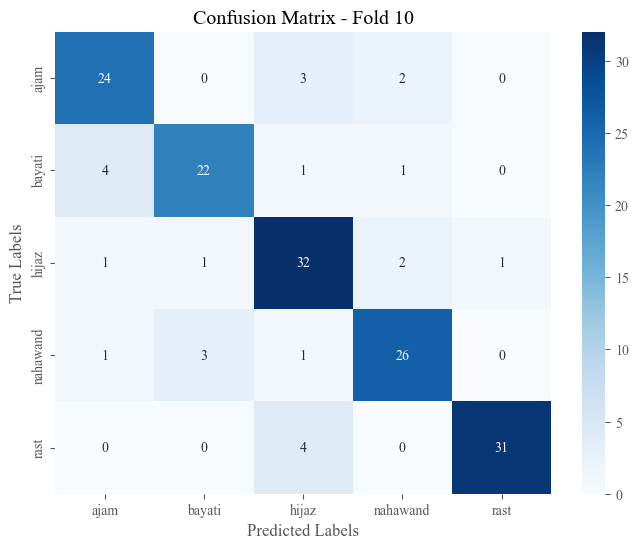

Classification Report:
               precision    recall  f1-score   support

        ajam       0.80      0.83      0.81        29
      bayati       0.85      0.79      0.81        28
       hijaz       0.78      0.86      0.82        37
    nahawand       0.84      0.84      0.84        31
        rast       0.97      0.89      0.93        35

    accuracy                           0.84       160
   macro avg       0.85      0.84      0.84       160
weighted avg       0.85      0.84      0.84       160



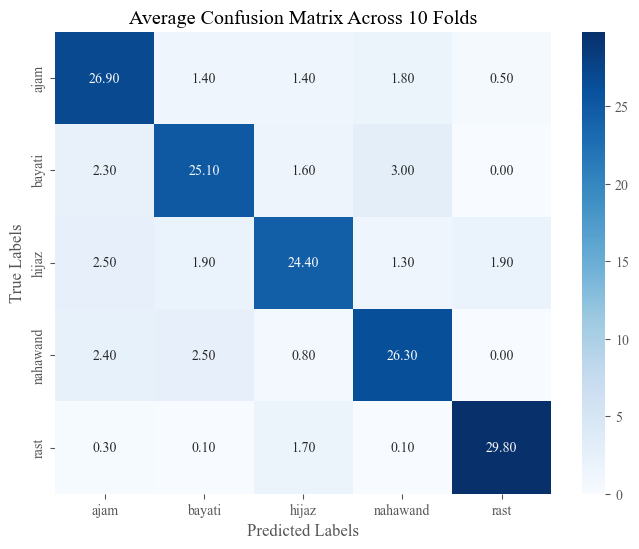

In [71]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

# Set font family to Times New Roman
mpl.rcParams['font.family'] = 'Times New Roman'

# Map class indices to specific labels
class_labels = ["ajam", "bayati", "hijaz", "nahawand", "rast"]

# Initialize variables to accumulate confusion matrices
average_cm = np.zeros((5, 5))  # Assuming 5 classes, adjust if necessary

# Loop through all folds
for i, fold_predictions in enumerate(all_predictions):
    print(f"\nResults for Fold {i + 1}:")

    true_labels = fold_predictions['true_labels']
    predicted_labels = fold_predictions['predicted_labels']

    # Create confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)

    # Accumulate confusion matrices
    average_cm += cm

    # Plot confusion matrix heatmap with labeled axes
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f'Confusion Matrix - Fold {i + 1}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()
    
    print("Classification Report:\n", classification_reports[i])

# Calculate the average confusion matrix
average_cm /= len(all_predictions)

# Plot average confusion matrix heatmap with labeled axes
plt.figure(figsize=(8, 6))
sns.heatmap(average_cm, annot=True, fmt='.2f', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Average Confusion Matrix Across 10 Folds')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



Results for Fold 1:


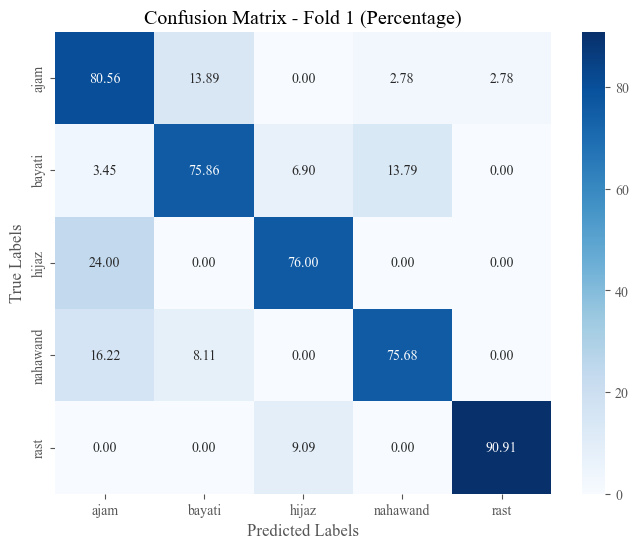

Classification Report:
               precision    recall  f1-score   support

        ajam       0.69      0.81      0.74        36
      bayati       0.73      0.76      0.75        29
       hijaz       0.79      0.76      0.78        25
    nahawand       0.85      0.76      0.80        37
        rast       0.97      0.91      0.94        33

    accuracy                           0.80       160
   macro avg       0.81      0.80      0.80       160
weighted avg       0.81      0.80      0.80       160


Results for Fold 2:


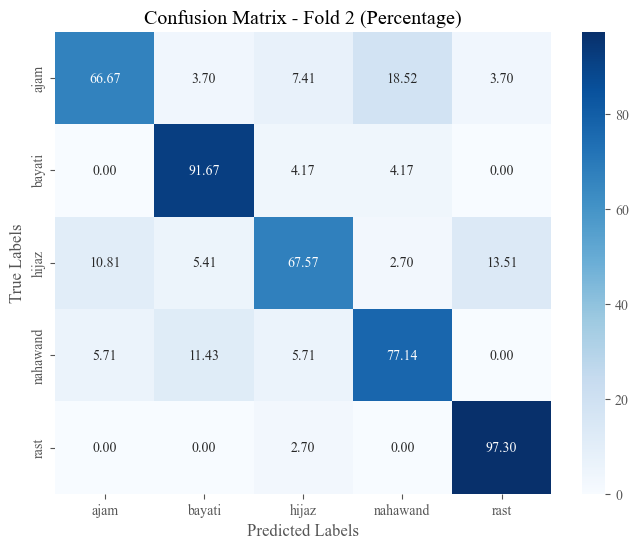

Classification Report:
               precision    recall  f1-score   support

        ajam       0.75      0.67      0.71        27
      bayati       0.76      0.92      0.83        24
       hijaz       0.81      0.68      0.74        37
    nahawand       0.79      0.77      0.78        35
        rast       0.86      0.97      0.91        37

    accuracy                           0.80       160
   macro avg       0.79      0.80      0.79       160
weighted avg       0.80      0.80      0.80       160


Results for Fold 3:


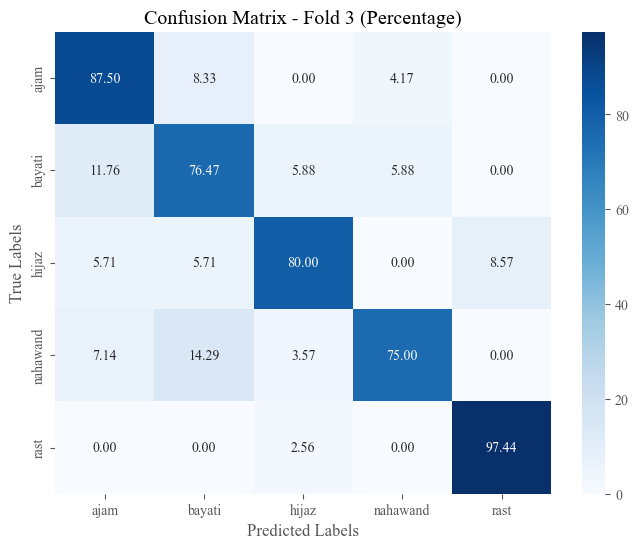

Classification Report:
               precision    recall  f1-score   support

        ajam       0.72      0.88      0.79        24
      bayati       0.76      0.76      0.76        34
       hijaz       0.88      0.80      0.84        35
    nahawand       0.88      0.75      0.81        28
        rast       0.93      0.97      0.95        39

    accuracy                           0.84       160
   macro avg       0.83      0.83      0.83       160
weighted avg       0.84      0.84      0.84       160


Results for Fold 4:


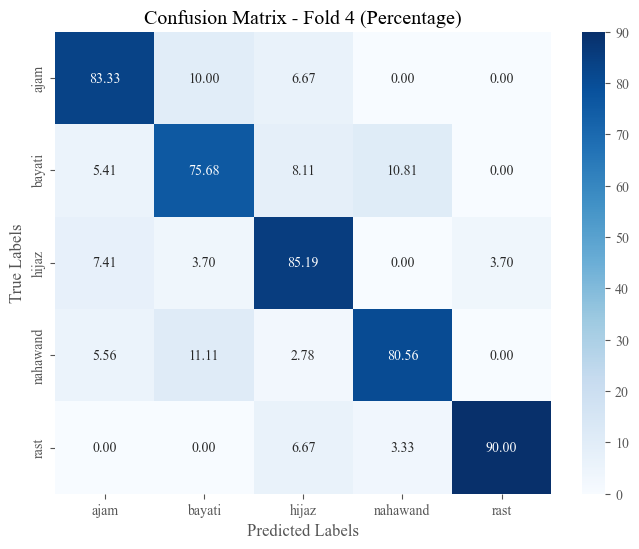

Classification Report:
               precision    recall  f1-score   support

        ajam       0.81      0.83      0.82        30
      bayati       0.78      0.76      0.77        37
       hijaz       0.74      0.85      0.79        27
    nahawand       0.85      0.81      0.83        36
        rast       0.96      0.90      0.93        30

    accuracy                           0.82       160
   macro avg       0.83      0.83      0.83       160
weighted avg       0.83      0.82      0.83       160


Results for Fold 5:


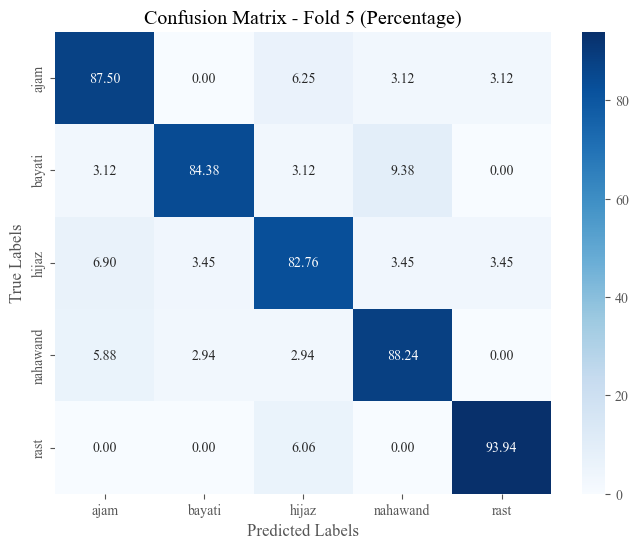

Classification Report:
               precision    recall  f1-score   support

        ajam       0.85      0.88      0.86        32
      bayati       0.93      0.84      0.89        32
       hijaz       0.80      0.83      0.81        29
    nahawand       0.86      0.88      0.87        34
        rast       0.94      0.94      0.94        33

    accuracy                           0.88       160
   macro avg       0.88      0.87      0.87       160
weighted avg       0.88      0.88      0.88       160


Results for Fold 6:


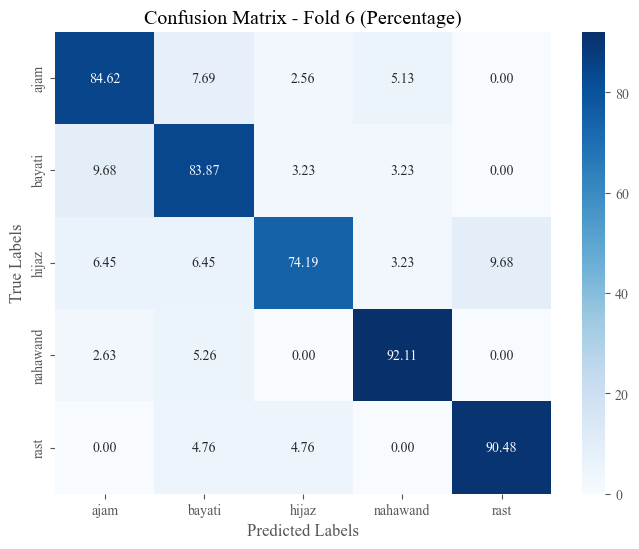

Classification Report:
               precision    recall  f1-score   support

        ajam       0.85      0.85      0.85        39
      bayati       0.76      0.84      0.80        31
       hijaz       0.88      0.74      0.81        31
    nahawand       0.90      0.92      0.91        38
        rast       0.86      0.90      0.88        21

    accuracy                           0.85       160
   macro avg       0.85      0.85      0.85       160
weighted avg       0.85      0.85      0.85       160


Results for Fold 7:


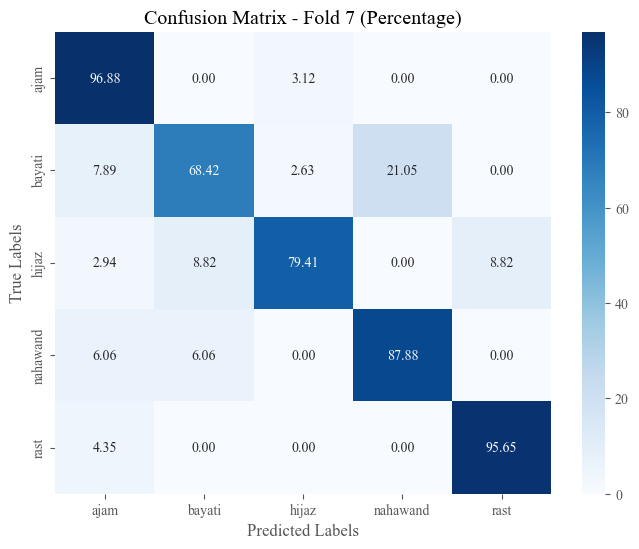

Classification Report:
               precision    recall  f1-score   support

        ajam       0.82      0.97      0.89        32
      bayati       0.84      0.68      0.75        38
       hijaz       0.93      0.79      0.86        34
    nahawand       0.78      0.88      0.83        33
        rast       0.88      0.96      0.92        23

    accuracy                           0.84       160
   macro avg       0.85      0.86      0.85       160
weighted avg       0.85      0.84      0.84       160


Results for Fold 8:


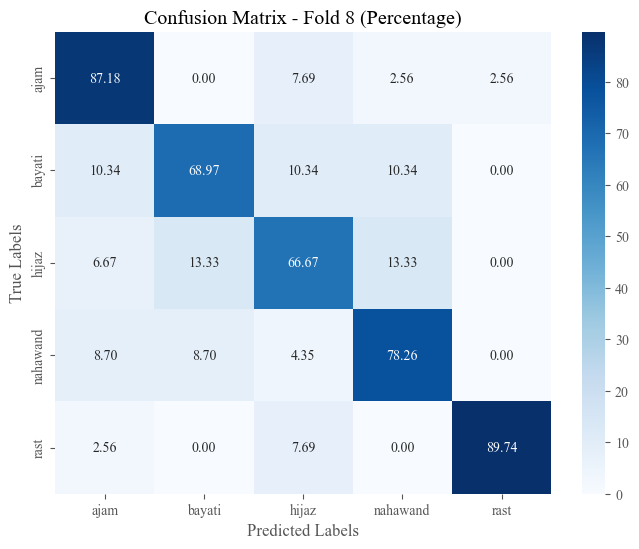

Classification Report:
               precision    recall  f1-score   support

        ajam       0.81      0.87      0.84        39
      bayati       0.77      0.69      0.73        29
       hijaz       0.67      0.67      0.67        30
    nahawand       0.69      0.78      0.73        23
        rast       0.97      0.90      0.93        39

    accuracy                           0.79       160
   macro avg       0.78      0.78      0.78       160
weighted avg       0.80      0.79      0.79       160


Results for Fold 9:


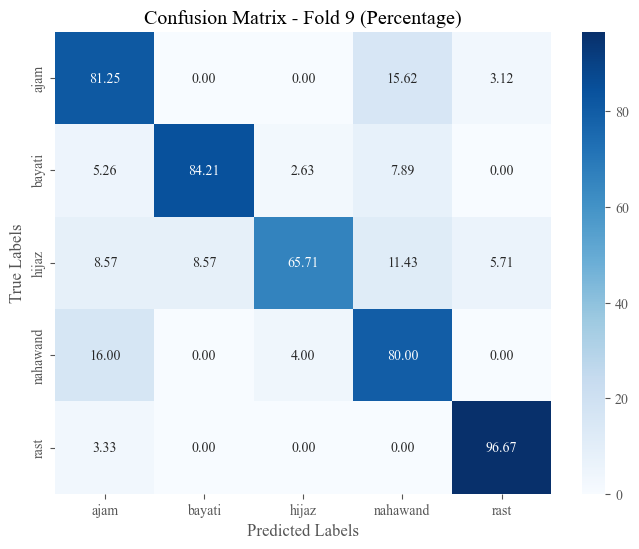

Classification Report:
               precision    recall  f1-score   support

        ajam       0.72      0.81      0.76        32
      bayati       0.91      0.84      0.88        38
       hijaz       0.92      0.66      0.77        35
    nahawand       0.62      0.80      0.70        25
        rast       0.91      0.97      0.94        30

    accuracy                           0.81       160
   macro avg       0.82      0.82      0.81       160
weighted avg       0.83      0.81      0.81       160


Results for Fold 10:


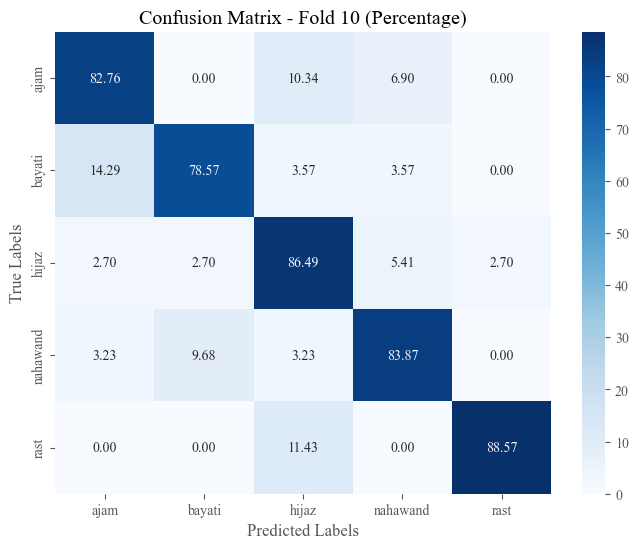

Classification Report:
               precision    recall  f1-score   support

        ajam       0.80      0.83      0.81        29
      bayati       0.85      0.79      0.81        28
       hijaz       0.78      0.86      0.82        37
    nahawand       0.84      0.84      0.84        31
        rast       0.97      0.89      0.93        35

    accuracy                           0.84       160
   macro avg       0.85      0.84      0.84       160
weighted avg       0.85      0.84      0.84       160



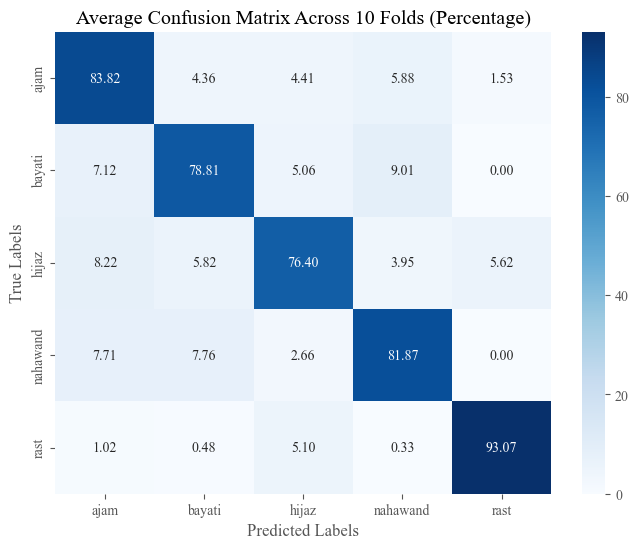


Average Classification Report Across 10 Folds:
          precision  recall  f1-score  support
ajam           0.78    0.84      0.81     32.0
bayati         0.81    0.79      0.80     32.0
hijaz          0.82    0.76      0.79     32.0
nahawand       0.81    0.82      0.81     32.0
rast           0.92    0.93      0.93     32.0


In [72]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

# Set font family to Times New Roman
mpl.rcParams['font.family'] = 'Times New Roman'

# Map class indices to specific labels
class_labels = ["ajam", "bayati", "hijaz", "nahawand", "rast"]

# Initialize variables to accumulate confusion matrices and classification reports
average_cm = np.zeros((5, 5))  # Assuming 5 classes, adjust if necessary
average_classification_report = {
    'precision': np.zeros(5),
    'recall': np.zeros(5),
    'f1-score': np.zeros(5),
    'support': np.zeros(5)
}

# Loop through all folds
for i, fold_predictions in enumerate(all_predictions):
    print(f"\nResults for Fold {i + 1}:")

    true_labels = fold_predictions['true_labels']
    predicted_labels = fold_predictions['predicted_labels']

    # Create confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)

    # Normalize confusion matrix to percentages
    cm_percentage = (cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]) * 100

    # Accumulate confusion matrices
    average_cm += cm_percentage

    # Display confusion matrix heatmap with labeled axes
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_percentage, annot=True, fmt='.2f', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f'Confusion Matrix - Fold {i + 1} (Percentage)')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # Display classification report
    current_classification_report = classification_report(true_labels, predicted_labels, target_names=class_labels)
    print("Classification Report:\n", current_classification_report)

    # Accumulate classification reports
    average_classification_report_fold = classification_report(true_labels, predicted_labels, target_names=class_labels, output_dict=True)
    for label in class_labels:
        average_classification_report['precision'][class_labels.index(label)] += average_classification_report_fold[label]['precision']
        average_classification_report['recall'][class_labels.index(label)] += average_classification_report_fold[label]['recall']
        average_classification_report['f1-score'][class_labels.index(label)] += average_classification_report_fold[label]['f1-score']
        average_classification_report['support'][class_labels.index(label)] += average_classification_report_fold[label]['support']

# Calculate the average confusion matrix
average_cm /= len(all_predictions)

# Plot average confusion matrix heatmap with labeled axes
plt.figure(figsize=(8, 6))
sns.heatmap(average_cm, annot=True, fmt='.2f', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Average Confusion Matrix Across 10 Folds (Percentage)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# Calculate the average values for precision, recall, and F1-score
for metric in ['precision', 'recall', 'f1-score', 'support']:
    average_classification_report[metric] /= len(all_predictions)

# Round the values in the average classification report to two decimal places
for metric in ['precision', 'recall', 'f1-score']:
    average_classification_report[metric] = np.round(average_classification_report[metric], 2)

# Display average classification report
print("\nAverage Classification Report Across 10 Folds:")
average_classification_report_df = pd.DataFrame(average_classification_report, index=class_labels)
print(average_classification_report_df)

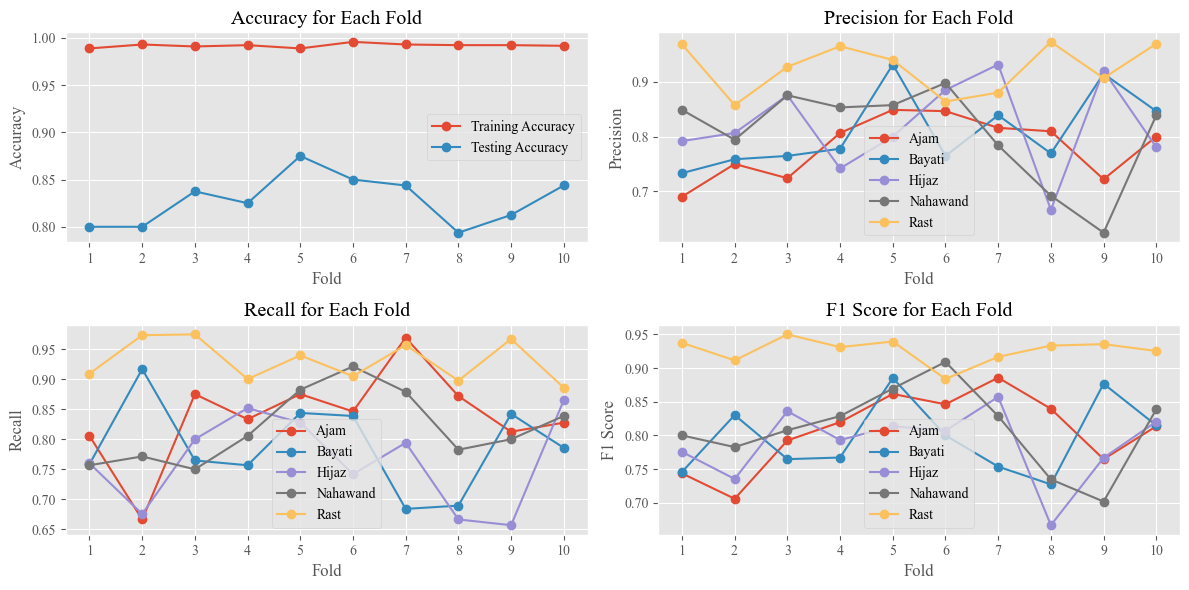

In [73]:
import matplotlib.pyplot as plt
import numpy as np

# Set font family to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'

# Define class labels
class_labels = ['Ajam', 'Bayati', 'Hijaz', 'Nahawand', 'Rast']

# Create arrays for plotting
fold_numbers = np.arange(1, fold)  # Adjust the range to match the actual number of folds
training_accuracies = np.array(train_accuracies)
testing_accuracies = np.array(testing_accuracies)
precision_scores = np.array(precicion_scores)
recall_scores = np.array(recall_scores)
f1_scores = np.array(f1_scores)

# Plotting Accuracy
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.plot(fold_numbers, training_accuracies, label='Training Accuracy', marker='o')
plt.plot(fold_numbers, testing_accuracies, label='Testing Accuracy', marker='o')
plt.title('Accuracy for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.xticks(fold_numbers)  # Set xticks to match the number of folds
plt.legend()

# Plotting Precision
plt.subplot(2, 2, 2)
for class_num in range(precision_scores.shape[1]):
    plt.plot(fold_numbers, precision_scores[:, class_num], label=f'{class_labels[class_num]}', marker='o')
plt.title('Precision for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Precision')
plt.xticks(fold_numbers)  # Set xticks to match the number of folds
plt.legend()

# Plotting Recall
plt.subplot(2, 2, 3)
for class_num in range(recall_scores.shape[1]):
    plt.plot(fold_numbers, recall_scores[:, class_num], label=f'{class_labels[class_num]}', marker='o')
plt.title('Recall for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Recall')
plt.xticks(fold_numbers)  # Set xticks to match the number of folds
plt.legend()

# Plotting F1 Score
plt.subplot(2, 2, 4)
for class_num in range(f1_scores.shape[1]):
    plt.plot(fold_numbers, f1_scores[:, class_num], label=f'{class_labels[class_num]}', marker='o')
plt.title('F1 Score for Each Fold')
plt.xlabel('Fold')
plt.ylabel('F1 Score')
plt.xticks(fold_numbers)  # Set xticks to match the number of folds
plt.legend()

plt.tight_layout()
plt.show()


Runtime pelatihan fold 1: 305.47 detik
Runtime pelatihan fold 2: 292.70 detik
Runtime pelatihan fold 3: 357.01 detik
Runtime pelatihan fold 4: 258.48 detik
Runtime pelatihan fold 5: 194.98 detik
Runtime pelatihan fold 6: 194.60 detik
Runtime pelatihan fold 7: 182.28 detik
Runtime pelatihan fold 8: 196.55 detik
Runtime pelatihan fold 9: 182.05 detik
Runtime pelatihan fold 10: 195.25 detik
----------------------------------------
Total waktu eksekusi untuk semua fold: 2359.38 detik
Rata-rata waktu eksekusi: 235.94 detik


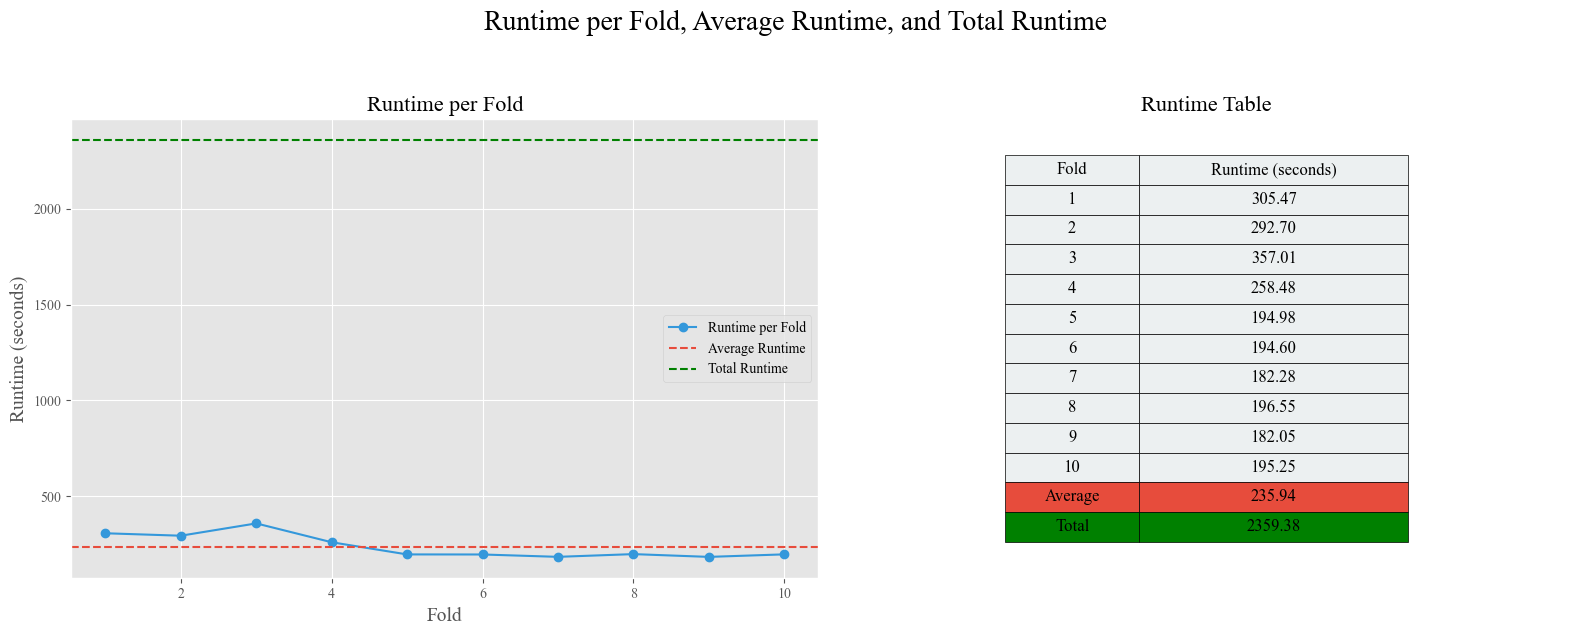

In [82]:
import numpy as np
import matplotlib.pyplot as plt

# Set font family to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'

# Cetak waktu eksekusi training untuk setiap fold
for i, time in enumerate(training_times):
    print(f"Runtime pelatihan fold {i + 1}: {time:.2f} detik")

# Menghitung rata-rata training loss dan akurasi dari masing-masing fold
average_time = np.mean(training_times)

# **Tambahkan total waktu eksekusi**
total_time = np.sum(training_times)

print("----------------------------------------")
print(f"Total waktu eksekusi untuk semua fold: {total_time:.2f} detik")
print(f"Rata-rata waktu eksekusi: {average_time:.2f} detik")

# Choose a color for highlighting and pastel blue for runtime per fold
highlight_color = '#e74c3c'  # Red for average runtime
pastel_blue_color = '#3498db'  # Pastel blue for runtime per fold

# Create a table with runtime information
table_data = [['Fold', 'Runtime (seconds)']]
for i, time in enumerate(training_times):
    table_data.append([f'{i + 1}', f'{time:.2f}'])

# Add the average and total runtime to the table and highlight the corresponding rows
table_data.append(['Average', f'{average_time:.2f}'])
table_data.append(['Total', f'{total_time:.2f}'])
average_row_index = len(table_data) - 2
total_row_index = len(table_data) - 1

# Plot runtime per fold as a line plot
plt.figure(figsize=(16, 6))

# Subplot 1: Line Plot
plt.subplot(1, 2, 1)
plt.plot(range(1, len(training_times) + 1), training_times, marker='o', color=pastel_blue_color, label='Runtime per Fold')
plt.axhline(y=average_time, color=highlight_color, linestyle='--', label='Average Runtime')
plt.axhline(y=total_time, color='green', linestyle='--', label='Total Runtime')  # **Tambahkan garis total waktu**
plt.title('Runtime per Fold', fontsize=16)
plt.xlabel('Fold', fontsize=14)
plt.ylabel('Runtime (seconds)', fontsize=14)
plt.legend()

# Subplot 2: Table
plt.subplot(1, 2, 2)
table = plt.table(cellText=table_data, loc='center', cellLoc='center', colWidths=[0.1, 0.2],
                  cellColours=[['#ecf0f1']*2] * average_row_index + [[highlight_color]*2] +
                               [['#ecf0f1']*2] * (total_row_index - average_row_index - 1) +
                               [['green']*2] +
                               [['#ecf0f1']*2] * (len(training_times) - total_row_index - 1))
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.8, 1.8)  # Adjust the scale to fit the content
plt.axis('off')  # Turn off the axis
plt.title('Runtime Table', fontsize=16)

plt.suptitle('Runtime per Fold, Average Runtime, and Total Runtime', fontsize=20, y=1.05)  # Adjust title position
plt.tight_layout()

plt.show()


In [75]:
# Menampilkan hasil training loss dan akurasi dari masing-masing fold
for i in range(len(losses)):
    print(f"Fold {i+1}: Loss = {losses[i]}, Accuracy = {train_accuracies[i]}")
    
# Menghitung rata-rata training loss dan akurasi dari masing-masing fold
average_loss = np.mean(losses)
average_accuracy = np.mean(train_accuracies)

print("----------------------------------------")
print(f"Rata-rata Loss: {average_loss}")
print(f"Rata-rata Akurasi: {average_accuracy}")

Fold 1: Loss = 0.036922868341207504, Accuracy = 0.9888888597488403
Fold 2: Loss = 0.021034738048911095, Accuracy = 0.9930555820465088
Fold 3: Loss = 0.036079291254282, Accuracy = 0.9909722208976746
Fold 4: Loss = 0.02163984812796116, Accuracy = 0.9923611283302307
Fold 5: Loss = 0.041064366698265076, Accuracy = 0.9888888597488403
Fold 6: Loss = 0.027782075107097626, Accuracy = 0.9958333373069763
Fold 7: Loss = 0.027256816625595093, Accuracy = 0.9930555820465088
Fold 8: Loss = 0.029215171933174133, Accuracy = 0.9923611283302307
Fold 9: Loss = 0.02700984664261341, Accuracy = 0.9923611283302307
Fold 10: Loss = 0.03635196015238762, Accuracy = 0.9916666746139526
----------------------------------------
Rata-rata Loss: 0.03043569829314947
Rata-rata Akurasi: 0.9919444501399994


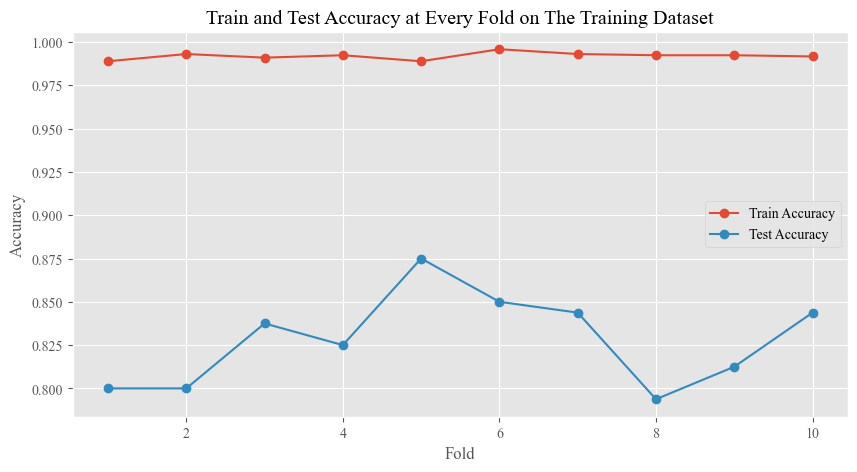

In [76]:
# Membuat plot akurasi
plt.figure(figsize=(10, 5))
plt.plot(range(1, fold ), train_accuracies, marker='o', label='Train Accuracy')
plt.plot(range(1, fold ), testing_accuracies, marker='o', label='Test Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy at Every Fold on The Training Dataset')
plt.legend()
plt.show()

Rata-rata Akurasi Training: 0.9919
Rata-rata Akurasi Testing: 0.8281


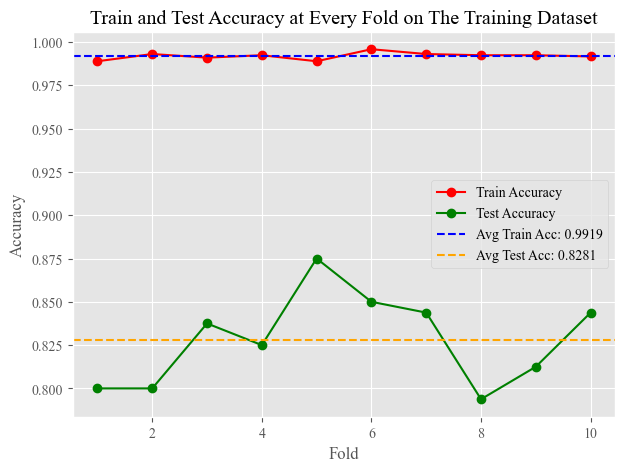

In [87]:
# Menampilkan rata-rata akurasi dari seluruh fold yang dilakukan pada training dan testing
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(testing_accuracies)

print(f"Rata-rata Akurasi Training: {avg_train_accuracy:.4f}")
print(f"Rata-rata Akurasi Testing: {avg_test_accuracy:.4f}")

# Membuat plot akurasi
plt.figure(figsize=(7, 5))
plt.plot(range(1, fold), train_accuracies, marker='o', color='red', label='Train Accuracy')
plt.plot(range(1, fold), testing_accuracies, marker='o', color='green', label='Test Accuracy')
plt.axhline(y=avg_train_accuracy, color='blue', linestyle='--', label=f'Avg Train Acc: {avg_train_accuracy:.4f}')
plt.axhline(y=avg_test_accuracy, color='orange', linestyle='--', label=f'Avg Test Acc: {avg_test_accuracy:.4f}')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy at Every Fold on The Training Dataset')
plt.legend()
plt.show()

In [77]:
# Convert list testing_accuracies ke dalam numpy array
testing_accuracies_np = np.array(testing_accuracies)

# Hitung standar deviasi
std_deviation = np.std(testing_accuracies_np)

# Tampilkan hasil standar deviasi
print(f"Standar Deviasi Testing Accuracies: {std_deviation}")

Standar Deviasi Testing Accuracies: 0.025039032030012655



All Fold Accuracies:
Fold 1 Accuracy: 0.8
Fold 2 Accuracy: 0.8
Fold 3 Accuracy: 0.8375
Fold 4 Accuracy: 0.825
Fold 5 Accuracy: 0.875
Fold 6 Accuracy: 0.85
Fold 7 Accuracy: 0.84375
Fold 8 Accuracy: 0.79375
Fold 9 Accuracy: 0.8125
Fold 10 Accuracy: 0.84375

Average Metrics Across Folds:
      Class  Precision  Recall  F1 Score
0      ajam       0.78    0.84      0.81
1    bayati       0.81    0.79      0.80
2     hijaz       0.82    0.76      0.79
3  nahawand       0.81    0.82      0.81
4      rast       0.92    0.93      0.93

Average Testing Accuracy Across All Folds: 0.83


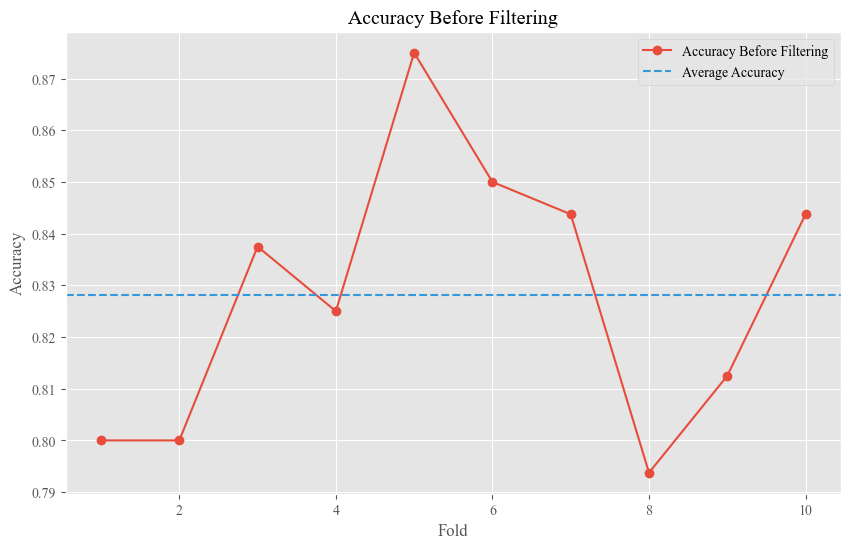

--------------------------------------------------------------------------------------------------------------------
Average Testing Accuracy: 0.828125
Standard Deviation: 0.025039032030012655
Filtered Testing Accuracies within One Standard Deviation:
Fold 3 - Accuracy: 0.8375
Fold 4 - Accuracy: 0.825
Fold 6 - Accuracy: 0.85
Fold 7 - Accuracy: 0.84375
Fold 9 - Accuracy: 0.8125
Fold 10 - Accuracy: 0.84375

Metrics for Filtered Testing Accuracies:
      Class  Precision  Recall  F1 Score
0      ajam       0.79    0.86      0.82
1    bayati       0.82    0.78      0.80
2     hijaz       0.85    0.78      0.81
3  nahawand       0.81    0.84      0.82
4      rast       0.92    0.93      0.93

Average Testing Accuracy (Filtered): 0.83


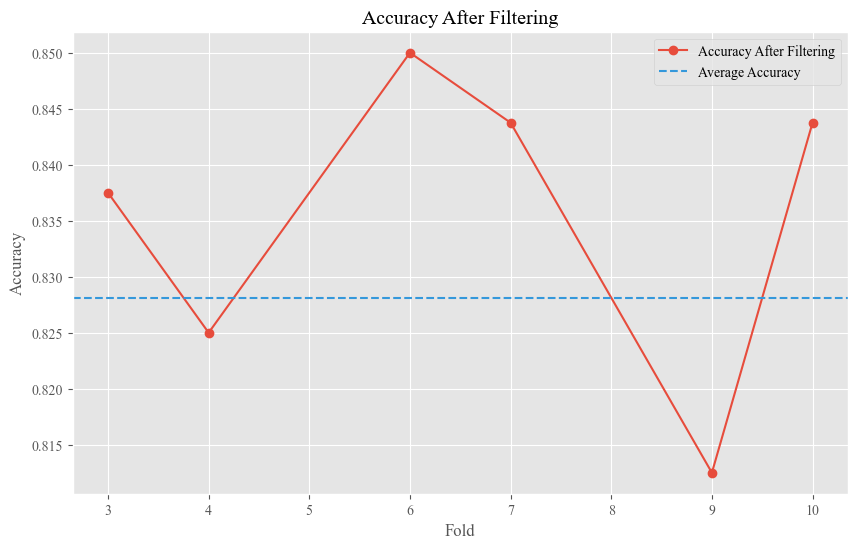

In [78]:
# Choose a color for highlighting and pastel blue for runtime per fold
highlight_color = '#e74c3c'  # Red for average runtime
pastel_blue_color = '#3498db'  # Pastel blue for runtime per fold

# Calculate the average metrics across all folds
avg_precision = np.mean(precision_scores, axis=0)
avg_recall = np.mean(recall_scores, axis=0)
avg_f1 = np.mean(f1_scores, axis=0)
avg_accuracy = np.mean(testing_accuracies)

# Create a DataFrame for average metrics
average_metrics = pd.DataFrame({
    'Class': ['ajam', 'bayati', 'hijaz', 'nahawand', 'rast'],
    'Precision': avg_precision,
    'Recall': avg_recall,
    'F1 Score': avg_f1
})

# Round average_metrics to two decimal places
average_metrics = average_metrics.round({'Precision': 2, 'Recall': 2, 'F1 Score': 2})

# Display the individual fold accuracies and average metrics
print("\nAll Fold Accuracies:")
for i, accuracy in enumerate(testing_accuracies, start=1):
    print(f"Fold {i} Accuracy: {accuracy}")

print("\nAverage Metrics Across Folds:")
print(average_metrics)

print(f"\nAverage Testing Accuracy Across All Folds: {avg_accuracy:.2f}")

# Plotting accuracy before filtering
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(testing_accuracies_np) + 1), testing_accuracies_np, marker='o', linestyle='-',color=highlight_color, label='Accuracy Before Filtering')
plt.axhline(y=avg_accuracy, color=pastel_blue_color, linestyle='--', label='Average Accuracy')

plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy Before Filtering')
plt.legend()
plt.show()

print("--------------------------------------------------------------------------------------------------------------------")

# Calculate average accuracy and standard deviation
average_accuracy = np.mean(testing_accuracies_np)
std_deviation = np.std(testing_accuracies_np)

# Filter testing accuracies based on standard deviation
testing_acc_after_std = []

for i, accuracy in enumerate(testing_accuracies_np):
    if average_accuracy - std_deviation <= accuracy <= average_accuracy + std_deviation:
        testing_acc_after_std.append((i + 1, accuracy))  # Include fold information

# Display results
print(f"Average Testing Accuracy: {average_accuracy}")
print(f"Standard Deviation: {std_deviation}")
print(f"Filtered Testing Accuracies within One Standard Deviation:")

for fold_num, acc in testing_acc_after_std:
    print(f"Fold {fold_num} - Accuracy: {acc}")

# Calculate and display precision, recall, and F1 score for filtered accuracies
filtered_predictions = [all_predictions[i - 1] for i, _ in testing_acc_after_std]

# Aggregate predictions from filtered folds
all_true_labels = np.concatenate([pred['true_labels'] for pred in filtered_predictions])
all_predicted_labels = np.concatenate([pred['predicted_labels'] for pred in filtered_predictions])

# Calculate metrics
filtered_precision = precision_score(all_true_labels, all_predicted_labels, average=None)
filtered_recall = recall_score(all_true_labels, all_predicted_labels, average=None)
filtered_f1 = f1_score(all_true_labels, all_predicted_labels, average=None)

# Create a DataFrame for metrics of filtered accuracies
filtered_metrics_df = pd.DataFrame({
    'Class': ['ajam', 'bayati', 'hijaz', 'nahawand', 'rast'],
    'Precision': filtered_precision,
    'Recall': filtered_recall,
    'F1 Score': filtered_f1
})

# Round filtered_metrics_df to two decimal places
filtered_metrics_df = filtered_metrics_df.round({'Precision': 2, 'Recall': 2, 'F1 Score': 2})

# Display metrics for filtered accuracies
print("\nMetrics for Filtered Testing Accuracies:")
print(filtered_metrics_df)

# Display average accuracy for filtered accuracies
print(f"\nAverage Testing Accuracy (Filtered): {average_accuracy:.2f}")

# Plotting accuracy after filtering
filtered_fold_numbers, filtered_accuracies = zip(*testing_acc_after_std)

plt.figure(figsize=(10, 6))
plt.plot(filtered_fold_numbers, filtered_accuracies, marker='o', linestyle='-',color=highlight_color, label='Accuracy After Filtering')
plt.axhline(y=average_accuracy, color=pastel_blue_color, linestyle='--', label='Average Accuracy')

plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy After Filtering')
plt.legend()
plt.show()


In [79]:
 # Prediksi model
prediction = model.predict(X_test)    
test_pred = np.argmax(prediction, axis=1)
test_pred = label_encoder.inverse_transform(test_pred)
true_y = label_encoder.inverse_transform(np.argmax(to_categorical(y_test), axis=1)[:, 1])

13/13 [==============================] - 0s 9ms/step


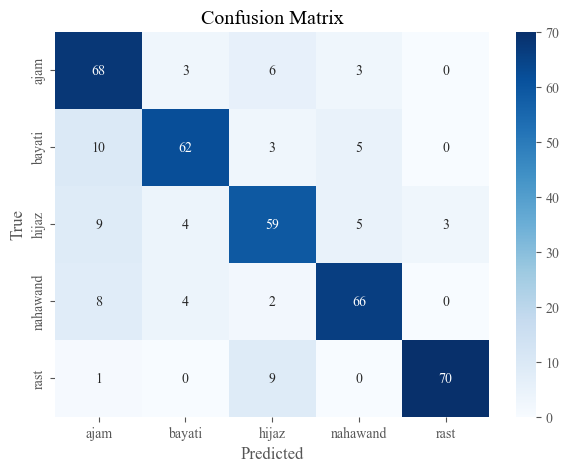


Classification Report:
              precision    recall  f1-score   support

        ajam     0.7083    0.8500    0.7727        80
      bayati     0.8493    0.7750    0.8105        80
       hijaz     0.7468    0.7375    0.7421        80
    nahawand     0.8354    0.8250    0.8302        80
        rast     0.9589    0.8750    0.9150        80

    accuracy                         0.8125       400
   macro avg     0.8198    0.8125    0.8141       400
weighted avg     0.8198    0.8125    0.8141       400



In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Hitung confusion matrix
conf_matrix = confusion_matrix(true_y, test_pred)

# Plot confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Tampilkan classification report
print("\nClassification Report:")
print(classification_report(true_y, test_pred, target_names=label_encoder.classes_, digits=4))
